# Analyze UF sensitivity runs

## pre-reqs
- py3.9



## Setting up the experiments
- runfolder: `exp/uf_tests_hpc`
- run script: `exp/uf_tests_hpc/run/run_exp`
    - adapt parameters in namelists
    - runtime info
        work_dir   = /central/scratch/elencz/caltech_fms_idealized/$exp_name/$run_name/workdir
        output_dir = /central/scratch/elencz/caltech_fms_idealized/$exp_name/$run_name/output  

    - diagnostics
        diagtable = $exp_home/input/diag_table_${model_type}_${analysis_type}
        raw_output = $work_dir/*.nc
        combined_output = $output_dir/combine/$date_name/$date_name.$ncfile

- current setup:
    - 5 years
    - T85 (see exp/uf_tests_hpc/input/namelists_moist)
    

In [28]:


# var_save_dir = "/central/scratch/elencz/caltech_fms_idealized/slab_syn_diff/analysis/"

In [29]:
#modules
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import integrate
import h5py as h5
from scipy import ndimage

# global parameters:
_a = 6371000.0
_g = 9.81 

In [30]:
# read in data_helper.py
exec(open("data_helper.py").read())

In [31]:
# control run
exp_name = "uf_tests_hpc"
run_name = "uf_tests_hpc_ctrl_0"
work_dir = "/central/scratch/elencz/caltech_fms_idealized/%s/%s/workdir"%(exp_name, run_name)
output_dir = "/central/scratch/elencz/caltech_fms_idealized/%s/%s/output"%(exp_name, run_name)

ppp_dir = output_dir + "/ppp_output/"

fname = "day%sh00.segment%s.nc"


day_list = np.arange(1,361)
last_day_of_yr = "1440"# "%04d"%day_list[-1]

lat, lon, sig, v, u, T, uv, vT, TT, eke, u_vrtcl_flux, pot_temp_vrtcl_flux, z1, T1, lh_flux_sfc, sh_flux_sfc = append_year_days_zonal_mean(ppp_dir+fname%(last_day_of_yr, "%s"), day_list)

KeyboardInterrupt: 

In [ ]:
# plotting helpers
def zonal_plot(lat, lev, var, title = '', subplot_no=(1,1,1), vrange = 20):
    a,b,c = subplot_no
    plt.subplot(a,b,c)
    f1 = plt.contourf(lat, lev, var, vrange)
    plt.colorbar(f1)
    plt.gca().invert_yaxis()
    plt.title(title)

# diagnostic helpers
def psi(V_xBAR,level_list_array,lat):
    _a, _g = (6371000. , 9.81) # Earth_radius, grav_constant
    latrad = lat*np.pi/180.
    psi = _a/_g * 2. * np.pi * np.cos(latrad)[None,None,:] * integrate.cumtrapz(V_xBAR,level_list_array,axis = 1)
    return psi



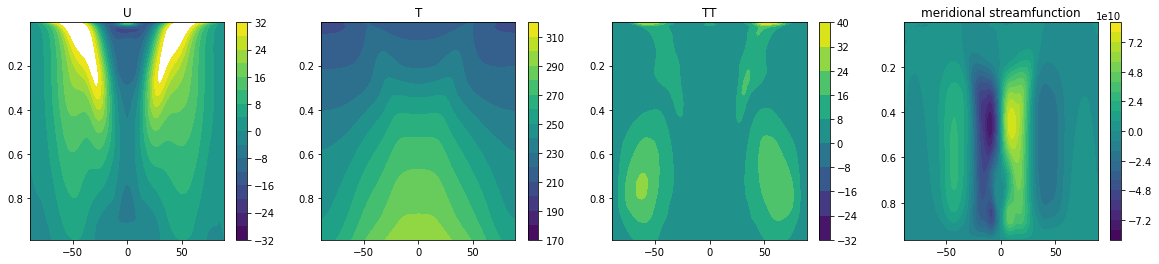

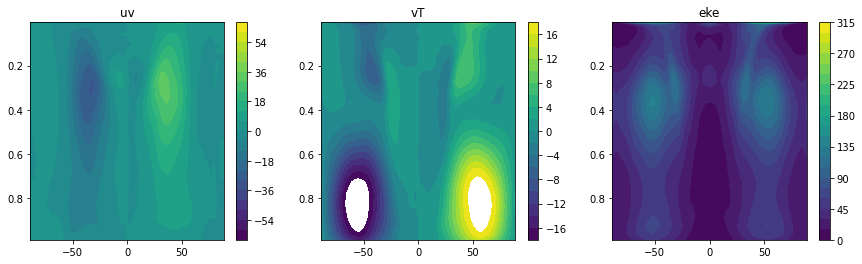

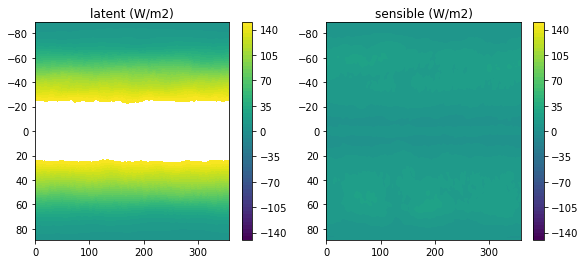

In [38]:
# U, T, meridional streamfunctions
plt.figure(figsize=(20,4))
zonal_plot(lat, sig, np.mean(u,axis=0), title = 'U', subplot_no = (1,4,1), vrange = np.arange(-32,33,4))
zonal_plot(lat, sig, np.mean(T,axis=0), title = 'T', subplot_no = (1,4,2), vrange = np.arange(170,330,10))
zonal_plot(lat, sig, np.mean(TT,axis=0), title = 'TT', subplot_no = (1,4,3), vrange = np.arange(-32,41,8))
pressure = sig * 100000.0 # units: Pa
zonal_plot(lat, sig[:-1], np.mean(psi(v, pressure ,lat),axis=0), title = 'meridional streamfunction', subplot_no = (1,4,4), vrange = np.arange(-8.8e10,8.9e10,0.8e10))

# vT, uv, u^2+v^2, TT
plt.figure(figsize=(20,4))
zonal_plot(lat, sig, np.mean(uv,axis=0), title = 'uv', subplot_no = (1,4,1) , vrange = np.arange(-66,67,6))
zonal_plot(lat, sig, np.mean(vT,axis=0), title = 'vT', subplot_no = (1,4,2) , vrange = np.arange(-18,19,2))
zonal_plot(lat, sig, np.mean(0.5*eke,axis=0), title = 'eke', subplot_no = (1,4,3), vrange = np.arange(0,330,15))

# turbulent surface fluxes
plt.figure(figsize=(20,4))
zonal_plot(lon, lat, (np.mean(lh_flux_sfc,axis=0)), title = 'latent (W/m2)', subplot_no = (1,4,1) , vrange = np.arange(-150,151,5))
zonal_plot(lon, lat, np.mean(sh_flux_sfc,axis=0), title = 'sensible (W/m2)', subplot_no = (1,4,2) , vrange = np.arange(-150,151,5))


In [ ]:
lmo = (u_vrtcl_flux[-1,:,:] / pot_temp_vrtcl_flux[-1,:,:]  / 0.4 * T1[-1,:,:])
zeta = z1[-1,:,:]/ lmo


34304.375267824726

Text(0.5, 0, '$\\zeta$')

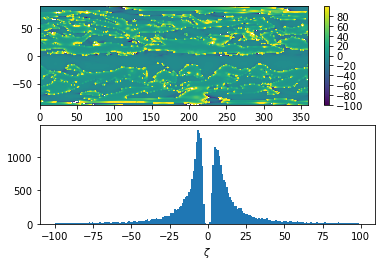

In [ ]:
# hist of zeta

plt.subplot(2,1,1)
c = plt.contourf(lon, lat, zeta, np.arange(-100,100,1))
plt.colorbar(c) 
plt.subplot(2,1,2)
hist = plt.hist(zeta.flatten(), bins = np.arange(-100,100,1))
plt.xlabel('$\zeta$')

In [ ]:
np.extrema(lmo)

AttributeError: module 'numpy' has no attribute 'extrema'

In [ ]:
# stationary waves ... 

In [ ]:
sig

masked_array(data=[0.004601  , 0.01082207, 0.01454894, 0.01936511,
                   0.02551974, 0.03329663, 0.04301224, 0.05501126,
                   0.06965926, 0.0873321 , 0.10840185, 0.13321935,
                   0.16209355, 0.19526839, 0.23289812, 0.27502227,
                   0.32154191, 0.37219895, 0.42656043, 0.48400947,
                   0.54374468, 0.60478926, 0.66601038, 0.72614911,
                   0.78386003, 0.83775905, 0.88647735, 0.92871842,
                   0.96331513, 0.98928317],
             mask=False,
       fill_value=1e+20)

In [36]:
# businger run
exp_name = "uf_tests_hpc_businger"
run_name = "uf_tests_hpc_businger_ctrl_10"
work_dir = "/central/scratch/elencz/caltech_fms_idealized/%s/%s/workdir"%(exp_name, run_name)
output_dir = "/central/scratch/elencz/caltech_fms_idealized/%s/%s/output"%(exp_name, run_name)

ppp_dir = output_dir + "/ppp_output/"

fname = "day%sh00.segment%s.nc"


day_list = np.arange(1,361)
last_day_of_yr = "1440"# "%04d"%day_list[-1]

lat, lon, sig, v_b, u_b, T_b, uv_b, vT_b, TT_b, eke_b, u_vrtcl_flux_b, pot_temp_vrtcl_flux_b, z1_b, T1_b, lh_flux_sfc_b, sh_flux_sfc_b = append_year_days_zonal_mean(ppp_dir+fname%(last_day_of_yr, "%s"), day_list)

Text(0, 0.5, 'surface flux (W/m2)')

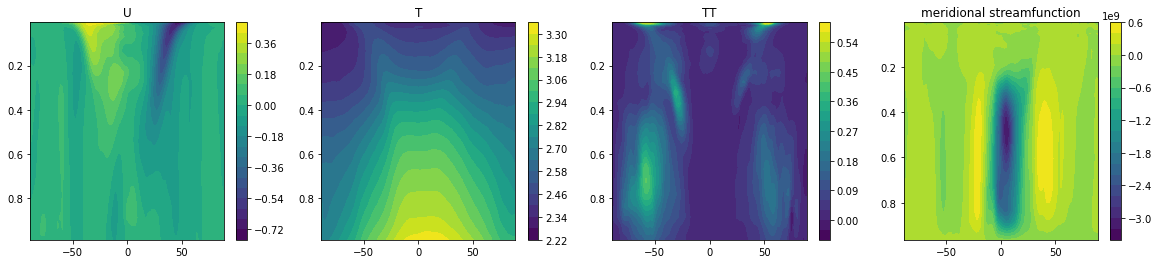

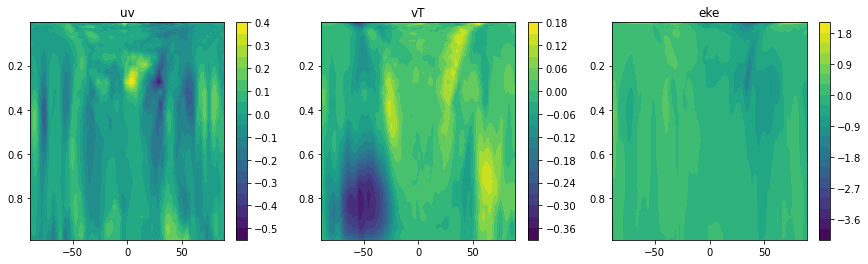

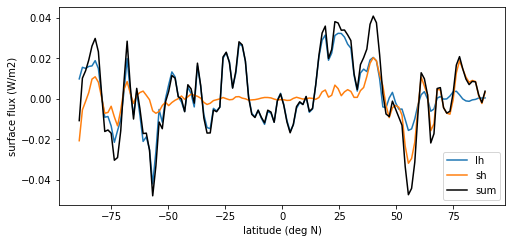

In [48]:
# U, T, meridional streamfunctions
plt.figure(figsize=(20,4))
zonal_plot(lat, sig, np.mean(u,axis=0) - np.mean(u_b,axis=0), title = 'U', subplot_no = (1,4,1)) #, vrange = np.arange(-32,33,4))
zonal_plot(lat, sig, np.mean(T,axis=0) - np.mean(T_b,axis=0), title = 'T', subplot_no = (1,4,2)) #, vrange = np.arange(170,330,10))
zonal_plot(lat, sig, np.mean(TT,axis=0) - np.mean(TT_b,axis=0), title = 'TT', subplot_no = (1,4,3)) #, vrange = np.arange(-32,41,8))
pressure = sig * 100000.0 # units: Pa
zonal_plot(lat, sig[:-1], np.mean(psi(v, pressure ,lat),axis=0) - np.mean(psi(v_b, pressure ,lat),axis=0), title = 'meridional streamfunction', subplot_no = (1,4,4)) #, vrange = np.arange(-8.8e10,8.9e10,0.8e10))

# vT, uv, u^2+v^2, TT
plt.figure(figsize=(20,4))
zonal_plot(lat, sig, np.mean(uv,axis=0) - np.mean(uv_b,axis=0), title = 'uv', subplot_no = (1,4,1) ) #, vrange = np.arange(-66,67,6))
zonal_plot(lat, sig, np.mean(vT,axis=0) - np.mean(vT_b,axis=0), title = 'vT', subplot_no = (1,4,2) ) #, vrange = np.arange(-18,19,2))
zonal_plot(lat, sig, np.mean(0.5*eke,axis=0) - np.mean(0.5*eke_b,axis=0), title = 'eke', subplot_no = (1,4,3)) #, vrange = np.arange(0,330,15))

# turbulent surface fluxes
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(lat, np.mean(lh_flux_sfc,axis=(0,-1)) -  np.mean(lh_flux_sfc_b,axis=(0,-1)) , label = "lh")#, vrange = np.arange(-66,67,6))
plt.plot(lat, np.mean(sh_flux_sfc,axis=(0,-1)) -  np.mean(sh_flux_sfc_b,axis=(0,-1)) , label = "sh" )#, vrange = np.arange(-18,19,2))
plt.plot(lat, np.mean(sh_flux_sfc,axis=(0,-1)) -  np.mean(sh_flux_sfc_b,axis=(0,-1)) +np.mean(lh_flux_sfc,axis=(0,-1)) -  np.mean(lh_flux_sfc_b,axis=(0,-1)), "k", label = "sum" )#, vrange = np.arange(-18,19,2))

plt.legend()
plt.xlabel("latitude (deg N)")
plt.ylabel("surface flux (W/m2)")
# zonal_plot(lon, lat, np.mean(sh_flux_sfc,axis=0) - np.mean(sh_flux_sfc_b,axis=0), title = 'sensible (W/m2)', subplot_no = (1,4,2) )#, vrange = np.arange(-18,19,2))
